# Big Data Project on Rocket Launching 

# Importing Library 

In [32]:
# Pandas library is used for handling tabular data
import pandas as pd
# NumPy is used for handling numerical series operations
import numpy as np
# Sklearn library contains all the machine learning packages we need to digest and extract patterns from the data
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split
# Machine learning libraries used to build a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Sklearn's preprocessing library is used for processing and cleaning the data 
from sklearn import preprocessing
# for visualizing the tree
import pydotplus
from IPython.display import Image

## Importing Data

In [33]:
data = pd.read_excel('RocketLaunchDataCompleted.xlsx')
data

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,1958-12-04,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26:00,Cloudy,NaN
1,NaN,1958-12-05,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26:00,Cloudy,NaN
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25:00,Cloudy,NaN
3,NaN,1958-12-07,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,...,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25:00,Partly Cloudy,NaN
4,NaN,1958-12-08,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,...,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24:00,Partly Cloudy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,NaN,2020-05-28,NaN,Cape Canaveral,NaN,NaN,87.0,71.0,79.36,NaN,...,20.0,10.0,NaN,NaN,NaN,30.08,NaN,13:45:00,Thunder,NaN
296,NaN,2020-05-29,NaN,Cape Canaveral,NaN,NaN,86.0,72.0,79.50,NaN,...,18.0,10.0,NaN,NaN,NaN,30.05,NaN,13:46:00,Fair,NaN
297,Space X Dragon,2020-05-30,20:22:00,Cape Canaveral,Crewed,Y,87.0,75.0,79.69,80.0,...,16.0,10.0,7.0,NaN,NaN,30.03,NaN,13:47:00,Fair,Rain before launch
298,NaN,2020-05-31,NaN,Cape Canaveral,NaN,NaN,87.0,72.0,79.70,NaN,...,13.0,10.0,NaN,NaN,NaN,30.01,NaN,13:47:00,Cloudy,NaN


In [34]:
data.info()  #To print information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          60 non-null     object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             59 non-null     object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            60 non-null     object        
 5   Launched?                     60 non-null     object        
 6   High Temp                     299 non-null    float64       
 7   Low Temp                      299 non-null    float64       
 8   Ave Temp                      299 non-null    float64       
 9   Temp at Launch Time           59 non-null     float64       
 10  Hist High Temp                299 non-null    float64       
 11  Hist Low Temp                 29

# To fill missing values with correct values 

In [35]:
data['Launched?'].fillna('N',inplace=True)
data['Crewed or Uncrewed'].fillna('Uncrewed',inplace=True)
data['Wind Direction'].fillna('unknown',inplace=True)
data['Condition'].fillna('Fair',inplace=True)
data.fillna(0,inplace=True)
data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,Uncrewed,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,Cloudy,0
1,0,1958-12-05,0,Cape Canaveral,Uncrewed,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,Cloudy,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,Cloudy,0
3,0,1958-12-07,0,Cape Canaveral,Uncrewed,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,Partly Cloudy,0
4,0,1958-12-08,0,Cape Canaveral,Uncrewed,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,Partly Cloudy,0


In [36]:
import seaborn as sns # used for data visualization and exploratory data analysis.
import matplotlib.pyplot as plt  
%matplotlib inline

# In data cleaning we make Text data to numerical data.

In [37]:
label_encoder = preprocessing.LabelEncoder()
data['Crewed or Uncrewed'] = label_encoder.fit_transform(data['Crewed or Uncrewed'])
data['Wind Direction'] = label_encoder.fit_transform(data['Wind Direction'])
data['Condition'] = label_encoder.fit_transform(data['Condition'])

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          300 non-null    object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             300 non-null    object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            300 non-null    int32         
 5   Launched?                     300 non-null    object        
 6   High Temp                     300 non-null    float64       
 7   Low Temp                      300 non-null    float64       
 8   Ave Temp                      300 non-null    float64       
 9   Temp at Launch Time           300 non-null    float64       
 10  Hist High Temp                300 non-null    float64       
 11  Hist Low Temp                 30

# Data Analysis

C:\Users\sukum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High Temp', ylabel='Density'>

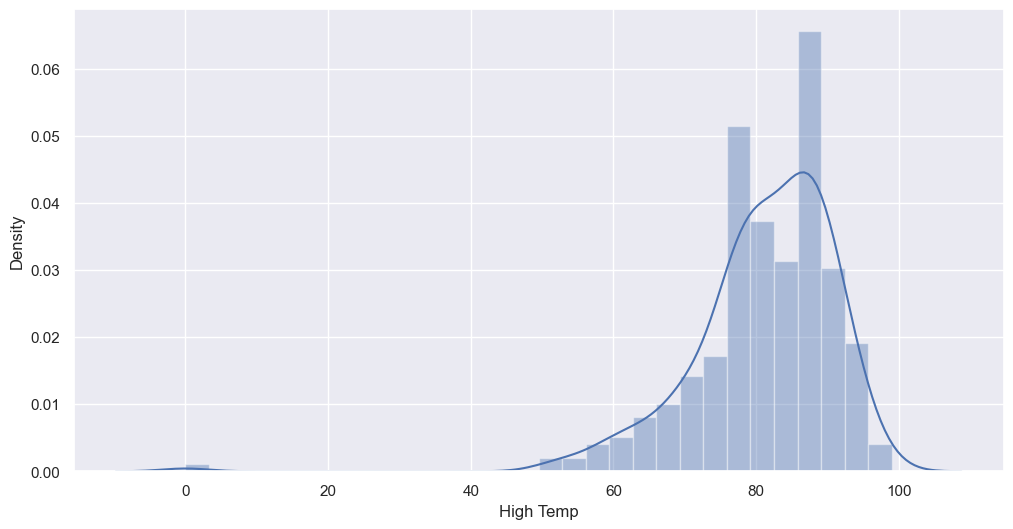

In [39]:
plt.figure(figsize=(12, 6))                                 
sns.distplot(data["High Temp"])

C:\Users\sukum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Low Temp', ylabel='Density'>

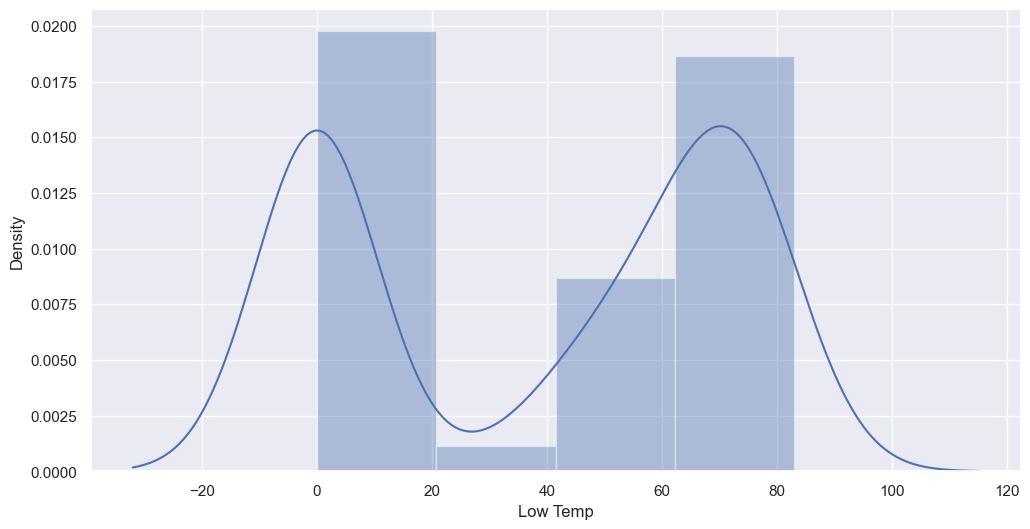

In [40]:
plt.figure(figsize=(12, 6))
sns.distplot(data["Low Temp"])

C:\Users\sukum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ave Temp', ylabel='Density'>

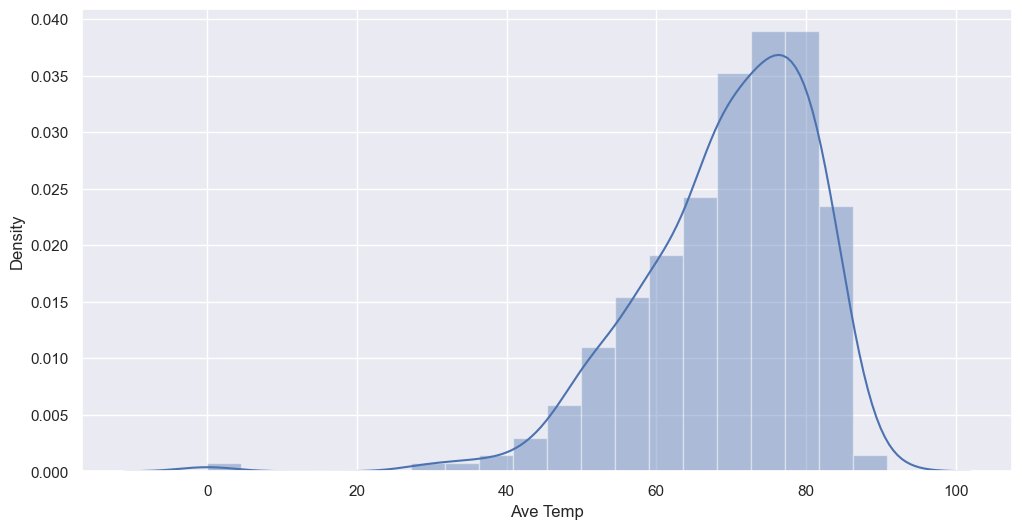

In [41]:
plt.figure(figsize=(12, 6))
sns.distplot(data["Ave Temp"])

C:\Users\sukum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Max Wind Speed', ylabel='Density'>

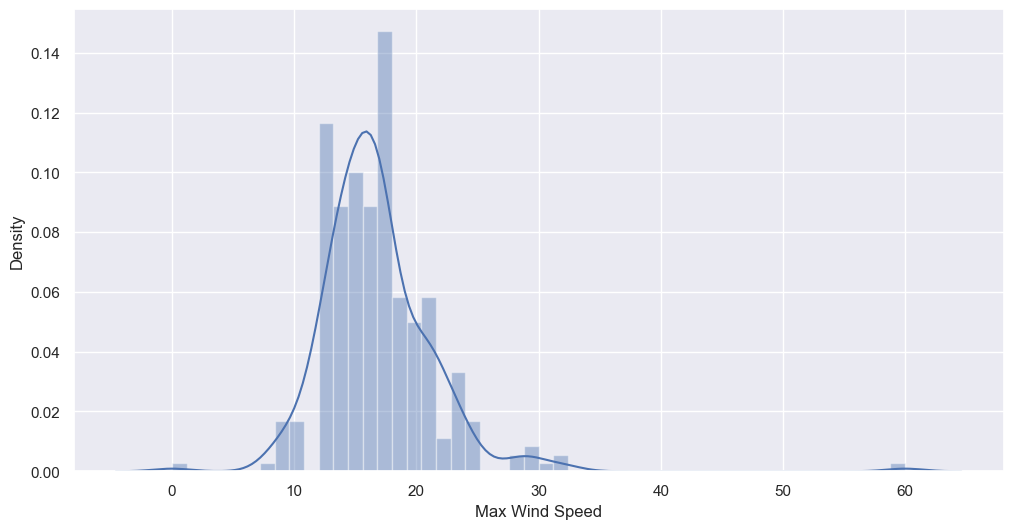

In [42]:
plt.figure(figsize=(12, 6))
sns.distplot(data["Max Wind Speed"])

In [43]:
data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,1,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,0,0
1,0,1958-12-05,0,Cape Canaveral,1,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,0,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,1,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,0,0
3,0,1958-12-07,0,Cape Canaveral,1,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,6,0
4,0,1958-12-08,0,Cape Canaveral,1,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,6,0


Removing Unwanted columns or data which will not dependent for rocket launch

In [44]:
y = data['Launched?']
data.drop(['Name','Date','Time (East Coast)','Location','Hist Ave Sea Level Pressure','Sea Level Pressure','Day Length','Notes','Hist Ave Visibility', 'Hist Ave Max Wind Speed', 'Launched?'], axis=1,inplace=True)
x= data

# Heat Mapping For Analysis

<AxesSubplot:>

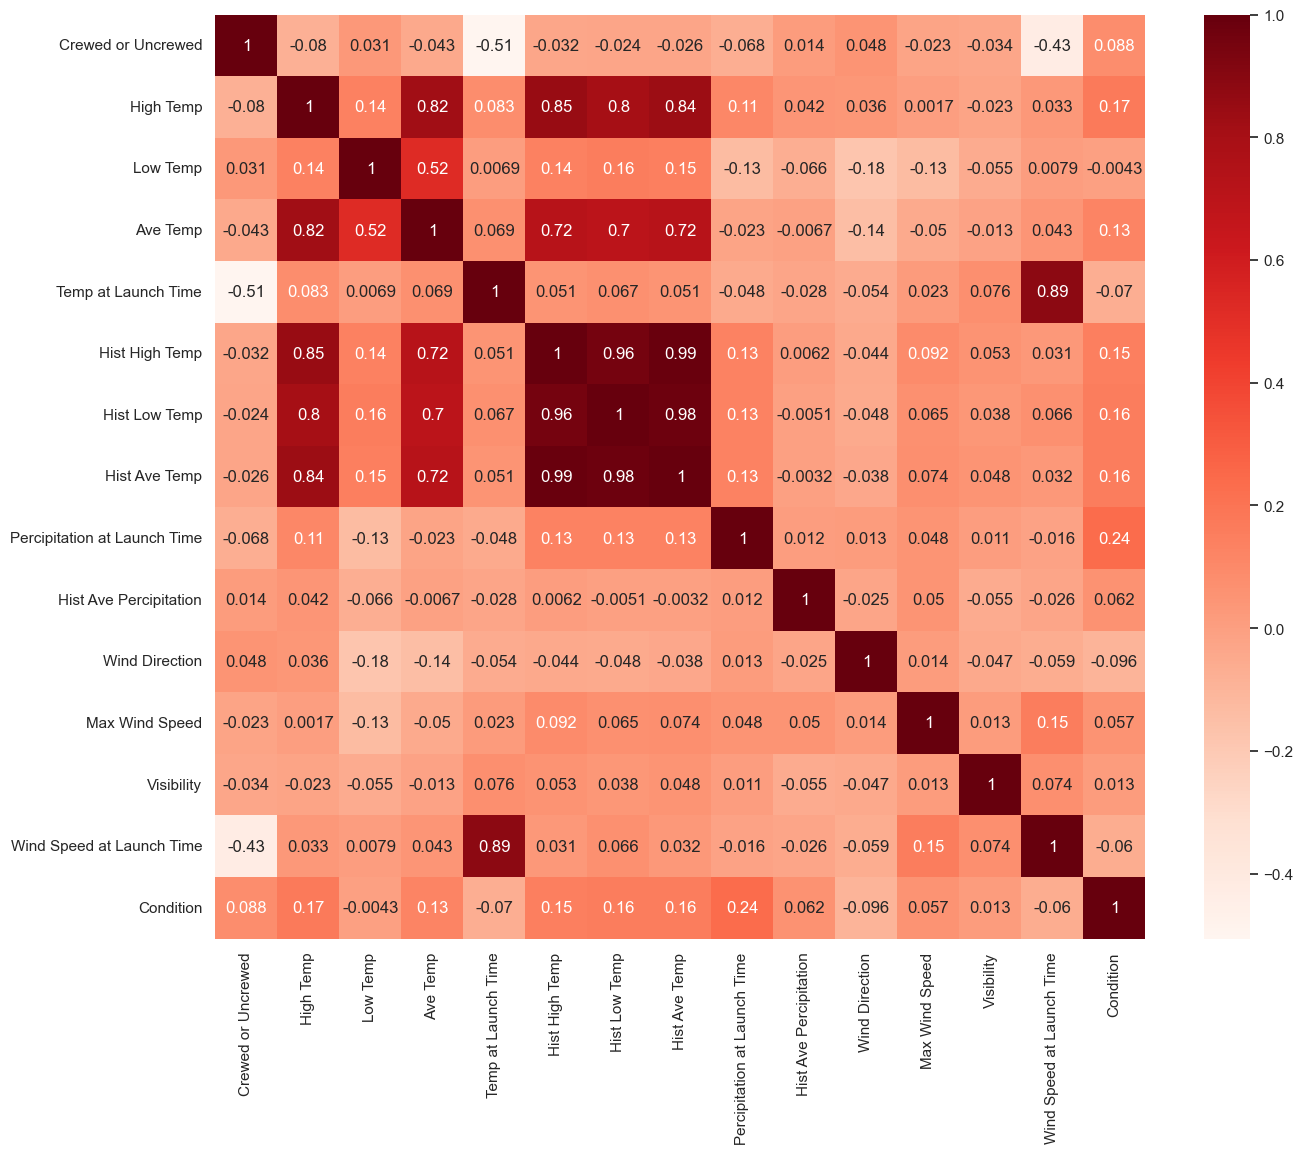

In [45]:
sns.set(rc = {'figure.figsize':(15,12)})
sns.heatmap(data.corr(), annot=True, cmap='Reds') 

#  Create decision tree classifier

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=99)

In [47]:
tree_model = DecisionTreeClassifier(random_state=0,max_depth=5)
tree_model.fit(x_train,y_train)# Fitting the model to the training data
y_pred = tree_model.predict(x_test)
print(y_pred)            #prediction on test Data

['N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'Y']


# Calculating Accuracy

In [48]:
tree_model.score(x_test,y_test)

0.9833333333333333

Text(54.75, 0.5, 'Actual Values')

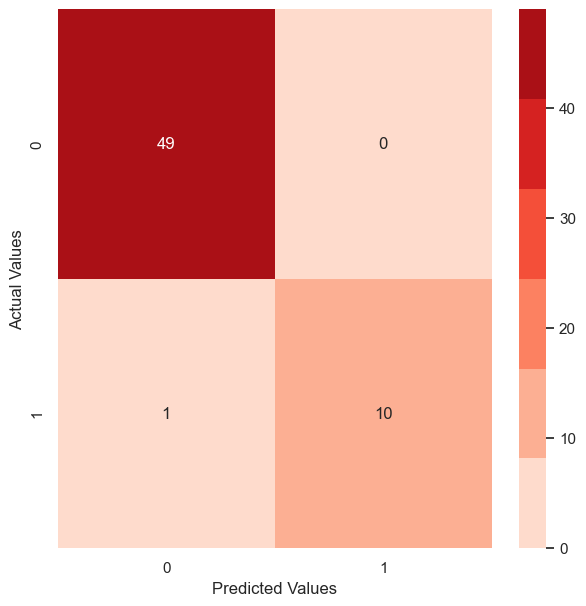

In [49]:
sns.set(rc = {'figure.figsize':(7,7)})
colormap = sns.color_palette("Reds")
p = sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap=colormap)

p.set_xlabel('Predicted Values')
p.set_ylabel('Actual Values')

In [50]:
result_df = pd.DataFrame({'Model': ['Dicision Tree'], 'Accuracy': 0.98})
result_df

,Model,Accuracy
0,Dicision Tree,0.98


In [51]:
data[(data['Wind Speed at Launch Time'] > 1) & (data['Max Wind Speed'] > 30.5)]


,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition
292,0,86.0,70.0,75.02,74.0,87.0,70.0,79.0,0.28,0.15,4,32.0,10.0,25.0,2


# Data input Manually to test for current situation 

In [54]:
data_input = [ 1.  , 75.  , 68.  , 71.  ,  0.  , 75.  , 55.  , 65.  ,  0.  , 0.08,  0.  , 16.  , 15.  ,  0.  ,  0. ]
tree_model.predict([data_input])

C:\Users\sukum\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['N'], dtype=object)